## Import Statements

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import metrics
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import RFE
sns.set()
import matplotlib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.svm import SVC
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from matplotlib.colors import LogNorm 

## Data Preprocessing

### Add binary column with -1, 0, 1

In [3]:
# Change number in binary column to a -1 every other 10 seconds
def controlCol(data):
    
    binary = data['binary']
    for i in range(0, len(binary)):
        test = i % 20
        if 0 <= test and test < 10:
            binary.loc[i] = -1
    data.loc['binary'] = binary    

#     print (binary)
    return data

### Reads and concatenates data

In [4]:
# Takes in experiment type(vi, to, tv) and object name
# Cold = 1
# Hot = 0

path = r'C:\\Users\\Cleah\\Documents\\A Tactile\\Data\\'

def concat_data(extype, obtype):
    #  Treats infinty values as NaN values
    pd.set_option('use_inf_as_na', True)
    # name of the data file
    fileName = glob.glob(path + "*\\" + extype + "-" + obtype + "*.csv")
#     print (fileName)
    # objectType is for instance hoco + ho
    objectType = obtype + obtype[0:2]
    # objectType2 is for instance hoco + co
    objectType2 = obtype + obtype[2:4]    
    
    totalRows = pd.read_csv(fileName[0])
    if objectType2 in fileName[0]:
        # add column of number 1
        totalRows['binary'] = 1
    else:
        # add column of number 0
        totalRows['binary'] = 0
    for i in range(1, len(fileName)):
        file = pd.read_csv(fileName[i])
        if objectType2 in fileName[i]:
            # add column of number 1
            file['binary'] = 1
        else:
            # add column of number 0
            file['binary'] = 0
        thisName = fileName[i]
        file['participant'] = thisName[-16]
        file['object'] = thisName[-17:-18]
        file = controlCol(file)
        totalRows = pd.concat([totalRows, file], axis = 0, ignore_index = True)
    
    totalRows = totalRows.drop(totalRows.columns[21:-3], axis = 1)
    # Remove electrode AF7
    totalRows = totalRows.drop(columns = ['Delta_AF7', 'Alpha_AF7', 'Gamma_AF7', 'Theta_AF7', 'Beta_AF7'], axis = 1)

    # Data Processing
    # deleting columns
#     totalRows = totalRows.drop(totalRows.columns[21:-2], axis = 1)
#     print(totalRows)
    # deleting rows
    totalRows.dropna(
       axis = 0,
       how = 'any',
       thresh = None,
       subset = None,
       inplace = True
     )
    totalRows = removeRows(totalRows)
    return totalRows

### Removes rows with 0 or -infinity

In [5]:
# This function removes rows with twenty zeros on them.
def removeRows(data):
    # Create a new DataFrame where each cell is True if zero and False otherwise
    zeros = data == 0
    # Create a new DataFrame where each row has a single cell containing number of zeros
    num_zeros = zeros.sum(axis = 1)  # Axis is 1 (rows = axis 0 and columns = axis 1) because we are producing sums of rows "along" axis 1
    
    # Create a new DataFrame where each row has a single cell that is True if there aren't 20 zeros and False otherwise
    keep_row = num_zeros != 20  # This creates a sort of "index" that tells us the indices of which rows to keep
    
    # Select the rows to keep from our input DataFrame (called df) using the indices of rows to keep that are stored in keep_row
    return data[keep_row]

### Data Processing File

In [6]:
data = concat_data("to", "rosm")
data = data.reset_index()
data.to_csv('test.csv', index = False)
shape = data.shape
print(data)

C:\Users\Cleah\anaconda3\envs\pt-project\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


     index                TimeStamp  Delta_TP9  Delta_AF8  Delta_TP10  \
0      106  2020-11-26 11:55:37.603   0.802877   1.405000    0.545470   
1      110  2020-11-26 11:55:38.604   0.802877   1.807325    0.545470   
2      112  2020-11-26 11:55:39.609   0.802877   0.752645    0.545470   
3      115  2020-11-26 11:55:40.603   0.802877   1.381651    0.545470   
4      119  2020-11-26 11:55:41.604   0.802877   1.026033    0.545470   
..     ...                      ...        ...        ...         ...   
518    655  2020-12-19 15:36:51.059   0.865304  -0.157046    0.678601   
519    656  2020-12-19 15:36:52.061   0.904686  -0.221253    0.860958   
520    657  2020-12-19 15:36:53.059   0.513670  -0.283930    0.358440   
521    658  2020-12-19 15:36:54.060   0.366193  -0.318875    0.255790   
522    659  2020-12-19 15:36:55.058   0.399163  -0.508285    0.176360   

     Theta_TP9  Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF8  Alpha_TP10  \
0     0.950431   1.197274    0.123447   0.476473

### To Pandas Data Frame

In [55]:
data = pd.read_csv('test.csv')
dataExtra = pd.read_csv('ROSM.csv')
print(data)

     index TimeStamp  Delta_TP9  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF8  \
0      106   55:37.6   0.802877   1.405000    0.545470   0.950431   1.197274   
1      110   55:38.6   0.802877   1.807325    0.545470   0.950431   1.570639   
2      112   55:39.6   0.802877   0.752645    0.545470   0.950431   0.423875   
3      115   55:40.6   0.802877   1.381651    0.545470   0.950431   0.498971   
4      119   55:41.6   0.802877   1.026033    0.545470   0.950431   0.581576   
..     ...       ...        ...        ...         ...        ...        ...   
513    650   36:46.1   0.515874  -0.669687    0.340382   0.594591  -0.224954   
514    651   36:47.1   1.482573  -0.462787    0.413670   0.674438  -0.291440   
515    652   36:48.1   1.777981   0.682157    1.105826   0.665380   0.406895   
516    653   36:49.1   0.571327   0.684062    1.118230  -0.072864   0.684211   
517    654   36:50.1   0.346185  -0.231042    0.015564   0.418015  -0.224809   

     Theta_TP10  Alpha_TP9  Alpha_AF8  

## Binary Classifier

### Preliminary Model

In [58]:
# In this cell, x and y are put in numpy arrays.
# Basic logistic regression model is made with 85% accuracy.
# All the data is used.


# Convert dataframe to numpy array
x = data[data.columns[2:-2]].to_numpy()
y = data[data.columns[-2]].to_numpy()
# Convert extra data to numpy array
xE = dataExtra[dataExtra.columns[2:-2]].to_numpy()
yE = dataExtra[dataExtra.columns[-2]].to_numpy()
print (data.columns[0])
xOrig = x 
yOrig = y

xOrigE = xE
yOrigE = yE

# dataOrig has 1, -1, 0
dataOrig = data

dataOrigE = dataExtra

# data has 1, 0
data = data[data['binary'] != -1]
x = x[y != -1,:] 
y = y[y != -1]
print(y)
# dataExtra = dataExtra[dataExtra['binary'] != -1]
# xE = xE[yE != -1,:] 
# yE = y[yE != -1] 
print (data.shape)
print (x)
print(max([max(z) for z in x]))
print(min([min(z) for z in x]))
# Normalize Data
scalerX = StandardScaler()
X = scalerX.fit_transform(x)
scalerX = StandardScaler()
xOrig = scalerX.fit_transform(xOrig)

scalerXE = StandardScaler()
XE = scalerXE.fit_transform(xE)
scalerXE = StandardScaler()
xOrigE = scalerXE.fit_transform(xOrigE)
# # Logistic Regression
# logReg = LogisticRegression(random_state = 0).fit(X, y)
# logReg.predict(X[:2, :])
# logReg.predict_proba(X[:2,:])
# logReg.score(X, y)

index
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
(231, 19)
[[ 0.80287704  1.80732541  0.54546955 ...  1.19815747  0.32445339
   1.22755367]
 [ 0.80287704  0.75264489  0.54546955 ...  1.19815747  0.03687533
   1.22755367]
 [ 0.80287704  1.38165071  0.54546955 ...  1.19815747 -0.04610864
   1.22755367]
 ...
 [ 1.33973289  0.58723449  0.56710514 ... -0.02163104  0.74862358
   0.47221524]
 [ 1.22260674  0.02184056  0.58049882 ... -0.0534012   0.68690374
   0.46890502]
 [ 0.99535682 -0.74079912  0.49083188 ... -0.2060947   0.50541376
   0.46227806]]
1.942615921
-0.8058951

### Logistic Regression

In [59]:
# Split data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logReg2 = LogisticRegression(random_state = 0)
logReg2 = logReg2.fit(X_train, y_train)
y_pred = logReg2.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7659574468085106


#### Confusion Matrix

[[15  3]
 [ 5 25]]


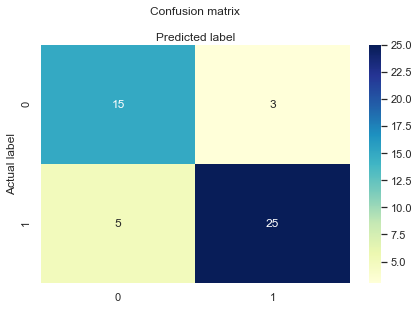

[False  True False False False False False False False False False False
  True False False]
[13  1 14  5  2 12  7  6  4  8 10  9  1 11  3]


C:\Users\Cleah\anaconda3\envs\pt-project\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Recursive Frequency Selection
rfe = RFE(logReg2, 2)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

### k-Nearest-Neighbours

In [64]:
neigh = KNeighborsClassifier(n_neighbors = 3)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(XE)
# Model Accuracy
accuracy = metrics.accuracy_score(yE, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6


In [65]:
np.save('xe.npy', XE)
np.save('ye.npy', yE)
np.save('ypred.npy', y_pred)

In [14]:
# filename = "Code/knn_touchRS.sav"
# pickle.dump(neigh, open(filename, 'wb'))
pkl_filename = "knn_touchRS.sav"
with open(pkl_filename, 'wb') as file:
    pickle.dump(neigh, file)

In [15]:
# This code block contains code that I adapted in an attempt to collect EEG data live.
# In the end, it didn't work, but at least I tried!
# -*- coding: utf-8 -*-
"""
Estimate Relaxation from Band Powers
This example shows how to buffer, epoch, and transform EEG data from a single
electrode into values for each of the classic frequencies (e.g. alpha, beta, theta)
Furthermore, it shows how ratios of the band powers can be used to estimate
mental state for neurofeedback.
The neurofeedback protocols described here are inspired by
*Neurofeedback: A Comprehensive Review on System Design, Methodology and Clinical Applications* by Marzbani et. al
Adapted from https://github.com/NeuroTechX/bci-workshop
"""

import numpy as np  # Module that simplifies computations on matrices
import matplotlib.pyplot as plt  # Module used for plotting
import pickle
import os
import utilities as utils
from pylsl import StreamInlet, resolve_byprop  # Module to receive EEG data

# Handy little enum to make code more readable


class Band:
    Delta = 0
    Theta = 1
    Alpha = 2
    Beta = 3
    Gamma = 4


""" EXPERIMENTAL PARAMETERS """
# Modify these to change aspects of the signal processing

# Length of the EEG data buffer (in seconds)
# This buffer will hold last n seconds of data and be used for calculations
BUFFER_LENGTH = 5

# Length of the epochs used to compute the FFT (in seconds)
EPOCH_LENGTH = 1

# Amount of overlap between two consecutive epochs (in seconds)
OVERLAP_LENGTH = 0.9

# Amount to 'shift' the start of each next consecutive epoch
SHIFT_LENGTH = EPOCH_LENGTH - OVERLAP_LENGTH

# Index of the channel(s) (electrodes) to be used
# 0 = left ear, 1 = left forehead, 2 = right forehead, 3 = right ear
INDEX_CHANNEL = [0]

if __name__ == "__main__":

    """ 1. CONNECT TO EEG STREAM """

    # Search for active LSL streams
    print('Looking for an EEG stream...')
    streams = resolve_byprop('type', 'EEG', timeout=2)
    if len(streams) == 0:
        raise RuntimeError('Can\'t find EEG stream.')

    # Set active EEG stream to inlet and apply time correction
    print("Start acquiring data")
    inlet = StreamInlet(streams[0], max_chunklen=12)
    eeg_time_correction = inlet.time_correction()

    # Get the stream info and description
    info = inlet.info()
    description = info.desc()

    # Get the sampling frequency
    # This is an important value that represents how many EEG data points are
    # collected in a second. This influences our frequency band calculation.
    # for the Muse 2016, this should always be 256
    fs = int(info.nominal_srate())

    """ 2. INITIALIZE BUFFERS """

    # Initialize raw EEG data buffer
    eeg_buffer = np.zeros((int(fs * BUFFER_LENGTH), 1))
    filter_state = None  # for use with the notch filter

    # Compute the number of epochs in "buffer_length"
    n_win_test = int(np.floor((BUFFER_LENGTH - EPOCH_LENGTH) /
                              SHIFT_LENGTH + 1))

    # Initialize the band power buffer (for plotting)
    # bands will be ordered: [delta, theta, alpha, beta]
    band_buffer = np.zeros((n_win_test, 5))

    filename = "knn_touchRS.sav"
# #     neigh = pickle.load(open(filename, 'rb'))
# #     """ 3. GET DATA """filename = "Code/knn_touchRS.sav"
# pickle.dump(neigh, open(filename, 'wb'))
    with open(filename, 'rb') as file: 
      pickle_model = pickle.load(file)



    # The try/except structure allows to quit the while loop by aborting the
    # script with <Ctrl-C>
    print('Press Ctrl-C in the console to break the while loop.')

    try:
        # The following loop acquires data, computes band powers, and calculates neurofeedback metrics based on those band powers
        while True:

            """ 3.1 ACQUIRE DATA """
            # Obtain EEG data from the LSL stream
            eeg_data, timestamp = inlet.pull_chunk(
                timeout=1, max_samples=int(SHIFT_LENGTH * fs))
            # initialize numpy arrays with zeros, length = 3
            alpha = np.zeros(3)
            beta = np.zeros(3)
            gamma = np.zeros(3)
            delta = np.zeros(3)
            theta = np.zeros(3)
            # dictinary: them:me
            electrode = {0:0, 2:2, 3:1}

            # Only keep the channel we're interested in
            for index_channel in [0, 2, 3]:
              ch_data = np.array(eeg_data)[:, index_channel]
              # Update EEG buffer with the new data
              eeg_buffer, filter_state = utils.update_buffer(
                  eeg_buffer, ch_data, notch=True,
                  filter_state=filter_state)

              """ 3.2 COMPUTE BAND POWERS """
              # Get newest samples from the buffer
              data_epoch = utils.get_last_data(eeg_buffer,
                                               EPOCH_LENGTH * fs)

              # Compute band powers
              band_powers = utils.compute_band_powers(data_epoch, fs)
              band_buffer, _ = utils.update_buffer(band_buffer,
                                                   np.asarray([band_powers]))
              # Compute the average band powers for all epochs in buffer
              # This helps to smooth out noise
              smooth_band_powers = np.mean(band_buffer, axis=0)
              index = electrode[index_channel]
              alpha[index] = band_powers[Band.Alpha]
              beta[index] = band_powers[Band.Beta]
              theta[index] = band_powers[Band.Theta]
              gamma[index] = band_powers[Band.Gamma]
              delta[index] = band_powers[Band.Delta]
#               print('Delta: ', band_powers[Band.Delta], ' Theta: ', band_powers[Band.Theta],
#                     ' Alpha: ', band_powers[Band.Alpha], ' Beta: ', band_powers[Band.Beta], 'Gamma:', band_powers[Band.Gamma])
            testData = np.concatenate((delta, theta, alpha, beta, gamma), axis = 0).reshape((1,15))
            testData = scalerX.transform(testData)
            y_pred = neigh.predict(testData)
            touchType = {1:'rough', 0:'smooth'}
            print(touchType[y_pred[0]])
            """ 3.3 COMPUTE NEUROFEEDBACK METRICS """
            # These metrics could also be used to drive brain-computer interfaces

# exit for loop...;)


            # Alpha Protocol:
            # Simple redout of alpha power, divided by delta waves in order to rule out noise
            alpha_metric = smooth_band_powers[Band.Alpha] / \
                smooth_band_powers[Band.Delta]
#             print(alpha)
#             print(beta)
#             print(delta)
#             print(gamma)
#             print(theta)
            # print('Alpha Relaxation: ', alpha_metric)

            # Beta Protocol:
            # Beta waves have been used as a measure of mental activity and concentration
            # This beta over theta ratio is commonly used as neurofeedback for ADHD
            # beta_metric = smooth_band_powers[Band.Beta] / \
            #     smooth_band_powers[Band.Theta]
            # print('Beta Concentration: ', beta_metric)

            # Alpha/Theta Protocol:
            # This is another popular neurofeedback metric for stress reduction
            # Higher theta over alpha is supposedly associated with reduced anxiety
            # theta_metric = smooth_band_powers[Band.Theta] / \
            #     smooth_band_powers[Band.Alpha]
            # print('Theta Relaxation: ', theta_metric)

    except KeyboardInterrupt:
        print('Closing!')

Looking for an EEG stream...


RuntimeError: Can't find EEG stream.

#### Confusion Matrix

[[14  4]
 [ 1 29]]


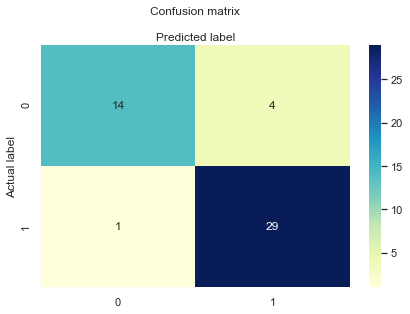

[False  True False False False False False False False False False False
  True False False]
[13  1 14  5  2 12  7  6  4  8 10  9  1 11  3]


C:\Users\Cleah\anaconda3\envs\pt-project\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [11]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Recursive Frequency Selection
rfe = RFE(logReg2, 2)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

### Principal Component Analysis

In [13]:
 # Principal Component Analysis
# Reduce to two dimensional 
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(data.columns)
loading_matrix = pd.DataFrame(loadings, columns = ['principal component 1', 'principal component 2'], index = data.columns[2:-2])
print(loading_matrix)
# Adding column to principal data that has the binary colum from data
principalDf['bin'] = data['binary'].values
principalDf


Index(['index', 'TimeStamp', 'Delta_TP9', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF8',
       'Alpha_TP10', 'Beta_TP9', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9',
       'Gamma_AF8', 'Gamma_TP10', 'binary', 'participant'],
      dtype='object')
            principal component 1  principal component 2
Delta_TP9                0.504848               0.279817
Delta_AF8                0.622174               0.500052
Delta_TP10               0.786536               0.231645
Theta_TP9                0.548932               0.098412
Theta_AF8                0.621825               0.562174
Theta_TP10               0.698124               0.237822
Alpha_TP9                0.337078              -0.497623
Alpha_AF8                0.712310               0.376100
Alpha_TP10               0.402699              -0.285390
Beta_TP9                 0.503376              -0.630514
Beta_AF8                 0.745145               0.077409
Beta_TP10            

,principal component 1,principal component 2,bin
0,3.614950,4.846653,0.0
1,4.363480,4.831912,0.0
2,2.375680,4.365083,0.0
3,0.484672,3.621394,0.0
4,-0.440650,3.150984,0.0
...,...,...,...
248,0.765544,0.167329,0.0
249,-0.381582,-0.599077,0.0
250,0.536165,-0.382171,0.0
251,1.197485,-0.824438,0.0


#### Principal Component Analysis Plot

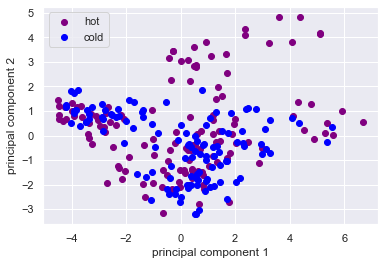

In [14]:
plt.figure()
plt.scatter(principalDf['principal component 1'][principalDf['bin']== 0], principalDf['principal component 2'][principalDf['bin'] == 0], c = 'purple', label = 'hot')
plt.scatter(principalDf['principal component 1'][principalDf['bin']== 1], principalDf['principal component 2'][principalDf['bin']== 1], c = 'blue', label = 'cold')
plt.legend(loc = 'upper left')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.show()

### Plot with Object Type

In [28]:
# Create plot with Beta_TP9 on the X-axis and Gamma_AF7 on the Y-axis
# Used recursive feature elimination
def plot(feature1, feature2):
    x = data[feature1]
    y = data[feature2]
    plt.xlim
    x_filtered1 = x[data['binary'] == 1]
    y_filtered1 = y[data['binary'] == 1]
    x_filtered0 = x[data['binary'] == 0]
    y_filtered0 = y[data['binary'] == 0]
    plt.scatter(x_filtered1, y_filtered1, c = 'plum', label = 'cold')
    plt.scatter(x_filtered0, y_filtered0, c = 'olivedrab', label = 'hot')
    plt.legend(loc = 'upper left')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

(-2.0, 1.5)

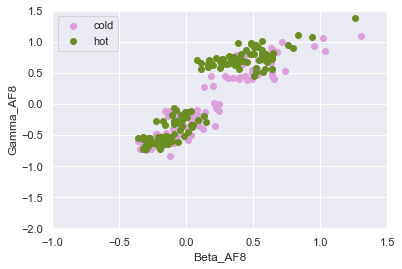

In [29]:
# plot('Alpha_AF7', 'Gamma_AF7')
plt.show()
plot('Beta_AF8', 'Gamma_AF8')
plt.xlim([-1, 1.5])
plt.ylim([-2, 1.5])

### Plot with Participant

In [30]:
def plotParticip(feature1, feature2):
    x = data[feature1]
    y = data[feature2]
    x_filtered1 = x[data['binary'] == 1]
    y_filtered1 = y[data['binary'] == 1]
    data_filtered1 = data[data['binary'] == 1]
    
    x_filtered0 = x[data['binary'] == 0]
    y_filtered0 = y[data['binary'] == 0]
    data_filtered0 = data[data['binary'] == 0]

    x_filteredA1 = x_filtered1[data_filtered1['participant'] == 'A']
    y_filteredA1 = y_filtered1[data_filtered1['participant'] == 'A']
    x_filteredA0 = x_filtered0[data_filtered0['participant'] == 'A']
    y_filteredA0 = y_filtered0[data_filtered0['participant'] == 'A']
    x_filteredB1 = x_filtered1[data_filtered1['participant'] == 'B']
    y_filteredB1 = y_filtered1[data_filtered1['participant'] == 'B']
    x_filteredB0 = x_filtered0[data_filtered0['participant'] == 'B']
    y_filteredB0 = y_filtered0[data_filtered0['participant'] == 'B']
    x_filteredC1 = x_filtered1[data_filtered1['participant'] == 'C']
    y_filteredC1 = y_filtered1[data_filtered1['participant'] == 'C']
    x_filteredC0 = x_filtered0[data_filtered0['participant'] == 'C']
    y_filteredC0 = y_filtered0[data_filtered0['participant'] == 'C']
    x_filteredD1 = x_filtered1[data_filtered1['participant'] == 'D']
    y_filteredD1 = y_filtered1[data_filtered1['participant'] == 'D']
    x_filteredD0 = x_filtered0[data_filtered0['participant'] == 'D']
    y_filteredD0 = y_filtered0[data_filtered0['participant'] == 'D']
    
#     x_filteredB = x[data['participant'] == 'B']
#     y_filteredB = y[data['participant'] == 'B']
#     x_filteredC = x[data['participant'] == 'C']
#     y_filteredC = y[data['participant'] == 'C']
#     x_filteredD = x[data['participant'] == 'D']
#     y_filteredD = y[data['participant'] == 'D']
    a = 1
    plt.scatter(x_filteredA0, y_filteredA0, c = 'springgreen', label = 'A:cold', alpha = a)
    plt.scatter(x_filteredA1, y_filteredA1, c = 'green', label = 'A:hot', alpha = a)
    plt.scatter(x_filteredB0, y_filteredB0, c = 'pink', label = 'B:cold', alpha = a)
    plt.scatter(x_filteredB1, y_filteredB1, c = 'red', label = 'B:hot', alpha = a)
    plt.scatter(x_filteredC0, y_filteredC0, c = 'cyan', label = 'C:cold', alpha = a)
    plt.scatter(x_filteredC1, y_filteredC1, c = 'blue', label = 'C:hot', alpha = a)
    plt.scatter(x_filteredD0, y_filteredD0, c = 'violet', label = 'D:cold', alpha = a)
    plt.scatter(x_filteredD1, y_filteredD1, c = 'purple', label = 'D:hot', alpha = a)
    print(y_filteredC1)
    plt.legend(loc = 'upper left')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

235   -0.553477
236   -0.526764
237   -0.403472
238   -0.557062
239   -0.667083
240   -0.645145
241   -0.599444
242   -0.582326
243   -0.597747
244   -0.719789
255   -0.515145
256   -0.559732
257   -0.519058
258   -0.551433
259   -0.584026
260   -0.553526
261   -0.562252
262   -0.593061
263   -0.527520
264   -0.683195
275   -0.621792
276   -0.647155
277   -0.617591
278   -0.673633
279   -0.633153
280   -0.652719
281   -0.654819
282   -0.598266
283   -0.607213
284   -0.534953
295   -0.623964
296   -0.564091
297   -0.731387
298   -0.736007
299   -0.841402
300   -0.506296
301   -0.472361
302   -0.474365
303   -0.476707
304   -0.502934
Name: Gamma_AF8, dtype: float64


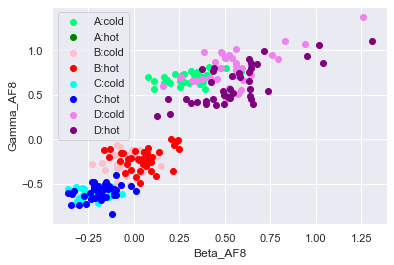

In [31]:
# plot('Alpha_AF7', 'Gamma_AF7')
# plt.show()
plotParticip('Beta_AF8', 'Gamma_AF8')
# plt.xlim([-1, 1.5])
# plt.ylim([-2, 1.5])

### Support Vector Machine

In [32]:
# Support Vector Machine
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
svema = SVC()
svema.fit(X_train, y_train)
y_pred = svema.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7058823529411765


#### Confusion Matrix

[[24  3]
 [12 12]]


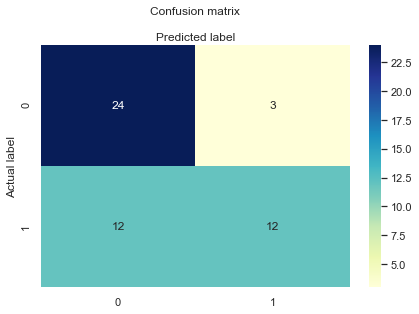

In [33]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Multiple Layer Perceptron

In [12]:
# Multiple Layer Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
multilper = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
y_pred = multilper.predict(X_test)
multilper.score(X_test, y_test)

0.9166666666666666

### Multilayer Perceptron Function

In [36]:
def multipercep(type1, type2, name1, name2):
# Get the data
    dataTouch = concat_data(type1, '*')
    dataTouch['extype'] = type1
    dataTVis = concat_data(type2, '*')
    dataTVis['extype'] = type2
    dataTAV = pd.concat([dataTouch, dataTVis], axis = 0, ignore_index = True)
    # make new x and y -- tav = touch and vision
    # Convert dataframe to numpy array
    Xtav = dataTAV[dataTAV.columns[2:-3]].to_numpy()
    ytav = dataTAV[dataTAV.columns[-1]].to_numpy()
    xTavOrig = Xtav
    yTavOrig = ytav
    Xtav = Xtav[ytav != -1,:] 
    ytav = ytav[ytav != -1]
    # Normalize Data
    scalerXtav = StandardScaler()
    Xtav = scalerXtav.fit_transform(Xtav)
    scalerXtav2 = StandardScaler()
    xTavOrig = scalerXtav2.fit_transform(xTavOrig)
    print(Xtav.shape)
    # Multiple Layer Perceptron
    X_train, X_test, y_train, y_test = train_test_split(Xtav, ytav, test_size = 0.20, random_state = 42)
    multilperTAV = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
    y_pred = multilperTAV.predict(X_test[:1])
    accuracy = multilperTAV.score(X_test, y_test)
    print(accuracy)
    # Principal Component Analysis
    # Reduce to two dimensional 
    pca = PCA(n_components = 2)
    principalComponents = pca.fit_transform(Xtav)
    principalDf2 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    # Adding column to principal data that has the binary colum from data
    print(dataTAV.columns)

    principalDf2['et'] = dataTAV['extype']
    principalDf2

    plt.figure()
    a2 = 0.2
    plt.scatter(principalDf2['principal component 1'][principalDf2['et']== type1], principalDf2['principal component 2'][principalDf2['et'] == type1], c = 'green', label = name1, alpha = a2)
    plt.scatter(principalDf2['principal component 1'][principalDf2['et']== type2], principalDf2['principal component 2'][principalDf2['et']== type2], c = 'cyan', label = name2, alpha = a2)
    plt.legend(loc = 'upper left')
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')

    plt.show()

### Experiment Types Classification and PCA

#### Touch vs. Touch-Vision

c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(5031, 14)
0.9175769612711023
Index(['TimeStamp', 'Delta_TP9', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF8', 'Alpha_TP10',
       'Beta_TP9', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8',
       'Gamma_TP10', 'binary', 'participant', 'extype'],
      dtype='object')


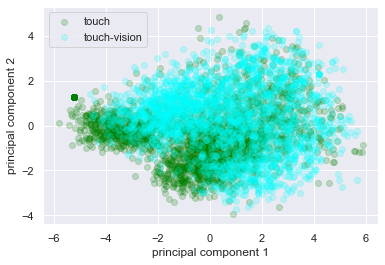

In [37]:
# Touch vs. Touch-Vision
multipercep("to", "tv", "touch", "touch-vision")

#### Vision vs. Touch-Vision

c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(4968, 14)


c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8450704225352113
Index(['TimeStamp', 'Delta_TP9', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF8', 'Alpha_TP10',
       'Beta_TP9', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8',
       'Gamma_TP10', 'binary', 'participant', 'extype'],
      dtype='object')


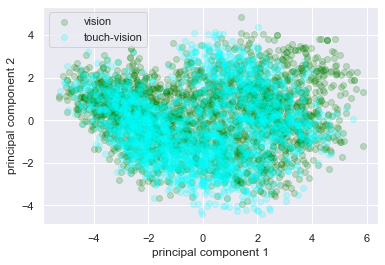

In [38]:
# Vision vs. Touch-Vision
multipercep("vi", "tv", "vision", "touch-vision")

#### Touch vs. Vision

c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(5023, 14)


c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.936318407960199
Index(['TimeStamp', 'Delta_TP9', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF8', 'Alpha_TP10',
       'Beta_TP9', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8',
       'Gamma_TP10', 'binary', 'participant', 'extype'],
      dtype='object')


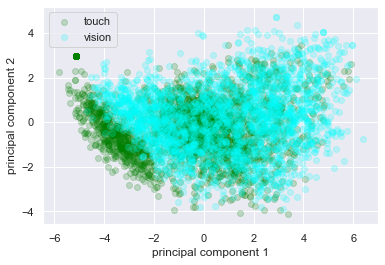

In [39]:
# Touch vs. Vision
multipercep("to", "vi", "touch", "vision")

### Principal Component Analysis Testing

In [8]:
# Get top ten PCA components and see how many components are required to get 90% explained variance
pca = PCA(n_components = 15)
principalComponents = pca.fit_transform(X)
print(np.sum(np.array(pca.explained_variance_ratio_)))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

0.9999999999999998
Explained variation per principal component: [0.3846555  0.17544554 0.12744521 0.08665212 0.07319704 0.03269902
 0.02457764 0.02016346 0.01889969 0.01599921 0.01292057 0.00960336
 0.00716909 0.00607932 0.00449326]


#### Heatmap

[[13.  1.  3.]
 [ 1.  6.  7.]
 [12. 14.  8.]
 [ 9.  5.  2.]
 [11. 10.  4.]]


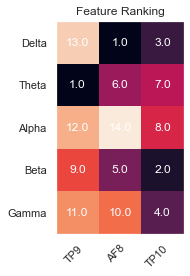

In [45]:
freqband = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
electrode = ["TP9", "AF8", "TP10"]
rfeRank = rfe.ranking_
rankMat = np.zeros((5,3))
# frequency band type
for i in np.arange(1, 6):
    # electrode
    for j in np.arange(1, 4): 
        
        rankMat[i - 1,j - 1] = rfeRank[5 * (j - 1) + i - 1]
print(rankMat)

fig, ax = plt.subplots()
im = ax.imshow(rankMat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(electrode)))
ax.set_yticks(np.arange(len(freqband)))
# ... and label them with the respective list entries
ax.set_xticklabels(electrode)
ax.set_yticklabels(freqband)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
         rotation_mode = "anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(freqband)):
    for j in range(len(electrode)):
        text = ax.text(j, i, rankMat[i, j],ha = "center", va = "center", color = "w")
        

ax.set_title("Feature Ranking")
fig.tight_layout()
plt.show()


In [46]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

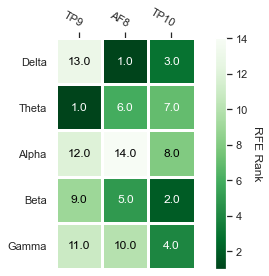

In [48]:
fig, ax = plt.subplots()

im, cbar = heatmap(rankMat, freqband, electrode, ax=ax,
                   cmap="Greens_r", cbarlabel="RFE Rank")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
plt.rcParams["axes.grid"] = False
fig.tight_layout()
plt.show()

#### Multilayer Perceptron

In [18]:
# Multilayer perceptron using the the ten principal components
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.20, random_state = 42)
multilper = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
y_pred = multilper.predict(X_test)
multilper.score(X_test, y_test)

0.6274509803921569

#### Logistic Regression

In [19]:
# Split data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.20, random_state=42)
logReg2 = LogisticRegression(random_state = 0)
logReg2 = logReg2.fit(X_train, y_train)
y_pred = logReg2.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.45098039215686275


### t-distributed Stochastic Neighbor Embedding

7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
      ... 
547    0.0
558    0.0
559    0.0
560    0.0
561    0.0
Name: binary, Length: 253, dtype: float64
        tsne1     tsne2  binaryTS
0    0.937780 -7.085841       0.0
1    0.941849 -7.029433       0.0
2    0.897616 -7.165244       0.0
3    0.915137 -7.323339       0.0
4    0.854827 -7.399756       0.0
..        ...       ...       ...
248  0.560071 -7.237433       0.0
249  0.401987 -7.365489       0.0
250  0.436752 -7.247421       0.0
251  0.388326 -7.165469       0.0
252  0.559394 -7.239227       0.0

[253 rows x 3 columns]
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
      ... 
547    0.0
558    0.0
559    0.0
560    0.0
561    0.0
Name: binary, Length: 253, dtype: float64
[[ 0.73821357  3.0030838   0.84407147 ... -0.24630295  1.13610389
  -1.27414851]
 [ 1.68334941  3.11764915  1.76209576 ...  0.21293976  1.22753897
  -0.67999344]
 [ 0.65111618  2.67490384  0.98764682 ... -0.75007529  1.21735236
  -0.97279069]

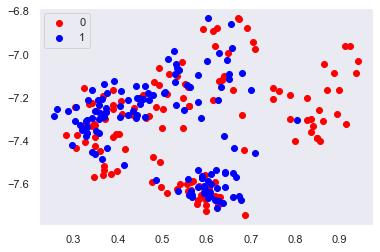

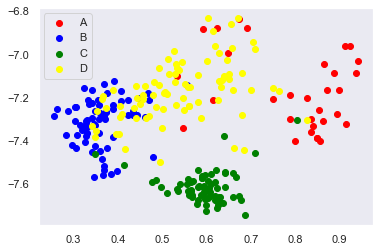

In [20]:
# TSNE plot
tsne = TSNE(n_components = 2, verbose = 0, perplexity = 250, n_iter = 1000, learning_rate = 400, init = 'pca')
tsne_pca_results = tsne.fit_transform(X)
# Visualization
tsneDF = pd.DataFrame(data = tsne_pca_results, columns = ['tsne1', 'tsne2'])
print(data['binary'])
tsneDF['binaryTS'] = data['binary'].values
print(tsneDF)
print(data['binary'])
print(X)

tsneDF['participant'] = data['participant'].values
plt.figure()
# # plot with binary groups
plt.scatter(tsneDF['tsne1'][tsneDF['binaryTS'] == 0], tsneDF['tsne2'][tsneDF['binaryTS'] == 0], color = 'red', label = '0')
plt.scatter(tsneDF['tsne1'][tsneDF['binaryTS'] == 1], tsneDF['tsne2'][tsneDF['binaryTS'] == 1], color = 'blue', label = '1')

plt.legend(loc = 'upper left')
plt.show()

# plot with participant groups
plt.scatter(tsneDF['tsne1'][tsneDF['participant'] == 'A'], tsneDF['tsne2'][tsneDF['participant'] == 'A'], c = 'red', label = 'A')
plt.scatter(tsneDF['tsne1'][tsneDF['participant'] == 'B'], tsneDF['tsne2'][tsneDF['participant'] == 'B'], c = 'blue', label = 'B')
plt.scatter(tsneDF['tsne1'][tsneDF['participant'] == 'C'], tsneDF['tsne2'][tsneDF['participant'] == 'C'], c = 'green', label = 'C')
plt.scatter(tsneDF['tsne1'][tsneDF['participant'] == 'D'], tsneDF['tsne2'][tsneDF['participant'] == 'D'], c = 'yellow', label = 'D')

plt.legend(loc = 'upper left')
plt.show()
    

### Hot: Touch vs. Vision

In [ ]:
# Multiple Layer Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
multilper = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
y_pred = multilper.predict(X_test)
multilper.score(X_test, y_test)

#### Confusion Matrix + RFE

In [ ]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Recursive Frequency Selection
rfe = RFE(logReg2, 2)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

## Multiple Classifier

### Logistic Regression

In [10]:
# # Shuffle data
sampling_strategy = {-1:100, 0:100, 1:100}
rus = RandomUnderSampler(sampling_strategy = sampling_strategy)
xOrig2, yOrig2 = rus.fit_resample(xOrig, yOrig)

# Split data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(xOrig2, yOrig2, test_size=0.20, random_state=42)
logReg2 = LogisticRegression(random_state = 0).fit(X_train, y_train)
y_pred = logReg2.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

NameError: name 'xOrig' is not defined

#### Confusion Matrix

[[8 9 5]
 [5 8 3]
 [9 4 9]]


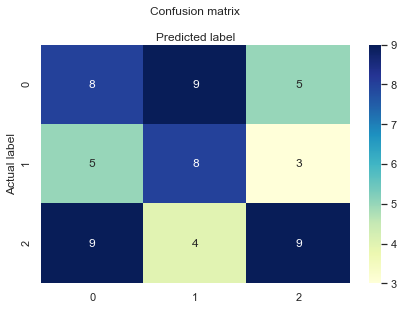

c:\users\cleah\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False False False False False False False False False False  True False
 False  True False]
[ 9 12  8 14  7 10 13  6  5  4  1  2  3  1 11]


In [22]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [-1,0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Recursive Frequency Selection
rfe = RFE(logReg2, 2)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

#### Principal Component Analysis Plot

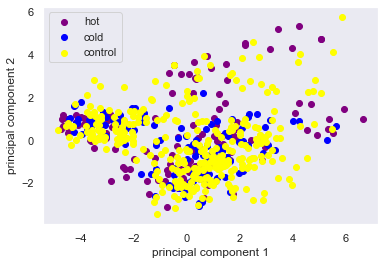

In [23]:
# PCA Plot
 # Principal Component Analysis
# Reduce to two dimensional 
components = 2
pca = PCA(n_components = components)
principalComponents = pca.fit_transform(xOrig)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# Adding column to principal data that has the binary colum from data
principalDf['bin'] = yOrig
principalDf

plt.figure()
plt.scatter(principalDf['principal component 1'][principalDf['bin']== 0], principalDf['principal component 2'][principalDf['bin'] == 0], c = 'purple', label = 'hot')
plt.scatter(principalDf['principal component 1'][principalDf['bin']== 1], principalDf['principal component 2'][principalDf['bin']== 1], c = 'blue', label = 'cold')
plt.scatter(principalDf['principal component 1'][principalDf['bin']== -1], principalDf['principal component 2'][principalDf['bin']== -1], c = 'yellow', label = 'control')

plt.legend(loc = 'upper left')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.show()

#### Logistic Regression + Principal Components

In [24]:
# Split data into 80% Training and 20% Testing
xPC = principalDf[principalDf.columns[0:-1]].to_numpy()
yPC = principalDf[principalDf.columns[2]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(xPC, yPC, test_size=0.20, random_state=42)
logReg2 = LogisticRegression(random_state = 0).fit(X_train, y_train)
y_pred = logReg2.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5132743362831859


### Decision Tree

In [25]:
# Create Decision Tree classifer object
deTr = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(xOrig2, yOrig2, test_size=0.20, random_state=42)

# Train Decision Tree Classifer
deTr = deTr.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = deTr.predict(X_test)

# Model Accuracy, how often is the classifier correct?
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc)


Accuracy: 0.43333333333333335


#### Confusion Matrix

[[ 5 11  6]
 [ 3  9  4]
 [ 5  5 12]]


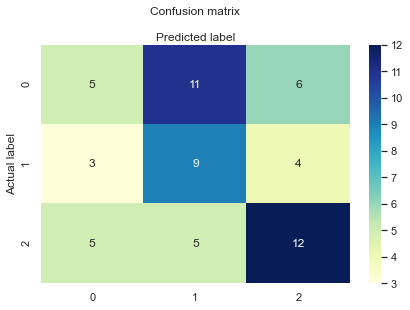

In [26]:
# Plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### k-Nearest-Neighbors

In [27]:
neigh = KNeighborsClassifier(n_neighbors = 3)
# Split data
X_train, X_test, y_train, y_test = train_test_split(xOrig2, yOrig2, test_size=0.20, random_state=42)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.45


#### Confusion Matrix

[[ 6  7  9]
 [ 6  8  2]
 [12  1  9]]


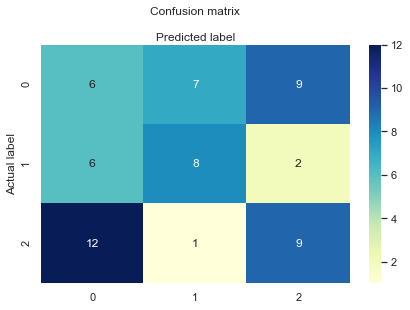

In [154]:
# Plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Touch vs. Vision vs. Touch-Vision 

In [16]:
# Touch vs. Vision vs. Touch-Vision
dataTouch = concat_data('to', '*')
dataTouch['extype'] = 'to'
dataTVis = concat_data('vi', '*')
dataTVis['extype'] = 'vi'
dataTV = concat_data('tv', '*')
dataTV['extype'] = 'tv'
dataTAV = pd.concat([dataTouch, dataTVis, dataTV], axis = 0, ignore_index = True)
# make new x and y -- tav = touch and vision

# Convert dataframe to numpy array
Xtav = dataTAV[dataTAV.columns[2:-3]].to_numpy()
ytav = dataTAV[dataTAV.columns[-1]].to_numpy()
xTavOrig = Xtav
yTavOrig = ytav
Xtav = Xtav[ytav != -1,:] 
ytav = ytav[ytav != -1]

# Normalize Data
scalerXtav = StandardScaler()
Xtav = scalerXtav.fit_transform(Xtav)
# scalerXtav2 = StandardScaler()
# xTavOrig = scalerXtav2.fit_transform(xTavOrig)
print(Xtav.shape)

# Multiple Layer Perceptron
X_train, X_test, y_train, y_test = train_test_split(Xtav, ytav, test_size = 0.20, random_state = 42)
multilperTAV = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
y_pred = multilperTAV.predict(X_test)
accuracy = multilperTAV.score(X_test, y_test)
print(accuracy)
# Principal Component Analysis
# Reduce to two dimensional 
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(Xtav)
principalDf2 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# Adding column to principal data that has the binary colum from data
print(dataTAV.columns)

principalDf2['et'] = dataTAV['extype']
principalDf2

C:\Users\Cleah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Cleah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Cleah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

(7511, 15)
0.7844311377245509
Index(['TimeStamp', 'Delta_TP9', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF8', 'Alpha_TP10',
       'Beta_TP9', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8',
       'Gamma_TP10', 'binary', 'participant', 'object', 'extype'],
      dtype='object')


,principal component 1,principal component 2,et
0,3.581569,2.043239,to
1,3.300257,2.103124,to
2,1.357322,2.419499,to
3,2.167465,2.429555,to
4,2.727549,2.252658,to
...,...,...,...
7506,1.788004,-1.816800,tv
7507,1.694366,-1.819081,tv
7508,-1.070879,-0.214721,tv
7509,0.018847,-1.087916,tv


#### Confusion Matrix

(1503, 15)
(1503,)
(1503,)
[[427  47  59]
 [ 20 375  83]
 [ 28  87 377]]


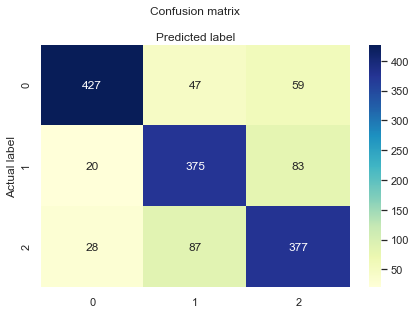

In [17]:
print(X_test.shape)
print(y_pred.shape)
print(y_test.shape)
# Plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

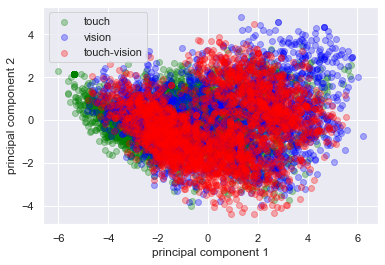

In [18]:
plt.figure()
a2 = 0.3
type1 = 'to'
type2 = 'vi'
type3 = 'tv'
plt.scatter(principalDf2['principal component 1'][principalDf2['et']== type1], principalDf2['principal component 2'][principalDf2['et'] == type1], c = 'green', label = 'touch', alpha = a2)
plt.scatter(principalDf2['principal component 1'][principalDf2['et']== type2], principalDf2['principal component 2'][principalDf2['et']== type2], c = 'blue', label = 'vision', alpha = a2)
plt.scatter(principalDf2['principal component 1'][principalDf2['et']== type3], principalDf2['principal component 2'][principalDf2['et']== type3], c = 'red', label = 'touch-vision', alpha = a2)

plt.legend(loc = 'upper left')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.show()

### Hot vs. Cold vs. Rough vs. Smooth vs. Dry vs. Wet

In [24]:
# Hot vs. Cold vs. Rough vs. Smooth vs. Dry vs. Wet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
multi = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (100, 100)).fit(X_train, y_train)
y_pred = multi.predict(X_test)
multi.score(X_test, y_test)

C:\Users\Cleah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7924528301886793